In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Indian_Extent = pd.read_excel(filepath, sheet_name='Indian-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Indian_Extent)
fp.date_time(Indian_Extent)

,Extent,Date
0,376618.799,1979-01-01
1,211788.726,1979-02-01
2,262868.141,1979-03-01
3,698377.304,1979-04-01
4,1252407.727,1979-05-01
...,...,...
533,1520776.003,2023-06-01
534,2076164.165,2023-07-01
535,2731799.027,2023-08-01
536,3179384.692,2023-09-01


In [5]:
scaler = MinMaxScaler()
Indian_Extent['Extent'] = scaler.fit_transform(Indian_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 4
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Indian_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((523, 12, 1), (523,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Indian_model_LT4/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
43/53 [=======================>......] - ETA: 0s - loss: 0.2363 - root_mean_squared_error: 0.4861

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 8s 95ms/step - loss: 0.2250 - root_mean_squared_error: 0.4743 - val_loss: 0.2167 - val_root_mean_squared_error: 0.4655
Epoch 2/50
50/53 [===========================>..] - ETA: 0s - loss: 0.1626 - root_mean_squared_error: 0.4033

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.1623 - root_mean_squared_error: 0.4029 - val_loss: 0.1782 - val_root_mean_squared_error: 0.4221
Epoch 3/50
53/53 [==============================] - ETA: 0s - loss: 0.1254 - root_mean_squared_error: 0.3542

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.1254 - root_mean_squared_error: 0.3542 - val_loss: 0.1471 - val_root_mean_squared_error: 0.3836
Epoch 4/50
46/53 [=========================>....] - ETA: 0s - loss: 0.1085 - root_mean_squared_error: 0.3293

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.1036 - root_mean_squared_error: 0.3219 - val_loss: 0.1225 - val_root_mean_squared_error: 0.3499
Epoch 5/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0820 - root_mean_squared_error: 0.2864

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0815 - root_mean_squared_error: 0.2856 - val_loss: 0.0990 - val_root_mean_squared_error: 0.3146
Epoch 6/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0664 - root_mean_squared_error: 0.2576

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0641 - root_mean_squared_error: 0.2532 - val_loss: 0.0800 - val_root_mean_squared_error: 0.2829
Epoch 7/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0513 - root_mean_squared_error: 0.2265

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0526 - root_mean_squared_error: 0.2294 - val_loss: 0.0643 - val_root_mean_squared_error: 0.2535
Epoch 8/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0432 - root_mean_squared_error: 0.2079

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0409 - root_mean_squared_error: 0.2024 - val_loss: 0.0512 - val_root_mean_squared_error: 0.2264
Epoch 9/50
43/53 [=======================>......] - ETA: 0s - loss: 0.0365 - root_mean_squared_error: 0.1910

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0339 - root_mean_squared_error: 0.1840 - val_loss: 0.0391 - val_root_mean_squared_error: 0.1977
Epoch 10/50
52/53 [============================>.] - ETA: 0s - loss: 0.0263 - root_mean_squared_error: 0.1623

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0265 - root_mean_squared_error: 0.1626 - val_loss: 0.0296 - val_root_mean_squared_error: 0.1721
Epoch 11/50
53/53 [==============================] - ETA: 0s - loss: 0.0220 - root_mean_squared_error: 0.1482

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0220 - root_mean_squared_error: 0.1482 - val_loss: 0.0206 - val_root_mean_squared_error: 0.1435
Epoch 12/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0217 - root_mean_squared_error: 0.1475

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0233 - root_mean_squared_error: 0.1528 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1163
Epoch 13/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0174 - root_mean_squared_error: 0.1320

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 5s 94ms/step - loss: 0.0172 - root_mean_squared_error: 0.1311 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0900
Epoch 14/50
53/53 [==============================] - ETA: 0s - loss: 0.0155 - root_mean_squared_error: 0.1243

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0155 - root_mean_squared_error: 0.1243 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0719
Epoch 15/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0179 - root_mean_squared_error: 0.1338

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0182 - root_mean_squared_error: 0.1350 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0682
Epoch 16/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0155 - root_mean_squared_error: 0.1247

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0164 - root_mean_squared_error: 0.1281 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0625
Epoch 17/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0158 - root_mean_squared_error: 0.1255 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0811
Epoch 18/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.1151

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0133 - root_mean_squared_error: 0.1152 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0608
Epoch 19/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0145 - root_mean_squared_error: 0.1203 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0717
Epoch 20/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0164 - root_mean_squared_error: 0.1282

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0160 - root_mean_squared_error: 0.1264 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0593
Epoch 21/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0162 - root_mean_squared_error: 0.1274

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0160 - root_mean_squared_error: 0.1266 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0565
Epoch 22/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0157 - root_mean_squared_error: 0.1253 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0588
Epoch 23/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0149 - root_mean_squared_error: 0.1221 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0569
Epoch 24/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0164 - root_mean_squared_error: 0.1281 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0584
Epoch 25/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0171 - root_mean_squared_error: 0.1307 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0610
Epoch 26/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0119 - root_mean_squared_error: 0.1093 - val_loss: 0.0059 - val_root_mean_squared

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0162 - root_mean_squared_error: 0.1274 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0563
Epoch 30/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0138 - root_mean_squared_error: 0.1175 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0816
Epoch 31/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0132 - root_mean_squared_error: 0.1151 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0585
Epoch 32/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0139 - root_mean_squared_error: 0.1178 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0655
Epoch 33/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0138 - root_mean_squared_error: 0.1173

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0134 - root_mean_squared_error: 0.1158 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0544
Epoch 34/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0153 - root_mean_squared_error: 0.1237 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0594
Epoch 35/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0163 - root_mean_squared_error: 0.1277 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0847
Epoch 36/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0097 - root_mean_squared_error: 0.0983 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0761
Epoch 37/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0143 - root_mean_squared_error: 0.1197 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0560
Epoch 38/50
52/53 [============================>.] - ETA: 0s - loss: 0.0172 - root_mean_squared_error: 0.1311

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0173 - root_mean_squared_error: 0.1314 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0535
Epoch 39/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0144 - root_mean_squared_error: 0.1201 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0736
Epoch 40/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0152 - root_mean_squared_error: 0.1233 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0547
Epoch 41/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0145 - root_mean_squared_error: 0.1205

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0151 - root_mean_squared_error: 0.1230 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0529
Epoch 42/50
52/53 [============================>.] - ETA: 0s - loss: 0.0155 - root_mean_squared_error: 0.1245

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 4s 81ms/step - loss: 0.0157 - root_mean_squared_error: 0.1253 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0520
Epoch 43/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0145 - root_mean_squared_error: 0.1203 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0740
Epoch 44/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0168 - root_mean_squared_error: 0.1298 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0538
Epoch 45/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0175 - root_mean_squared_error: 0.1321

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0171 - root_mean_squared_error: 0.1306 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0516
Epoch 46/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0126 - root_mean_squared_error: 0.1122 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0521
Epoch 47/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0157 - root_mean_squared_error: 0.1254

INFO:tensorflow:Assets written to: Indian_model_LT4\assets


INFO:tensorflow:Assets written to: Indian_model_LT4\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0161 - root_mean_squared_error: 0.1267 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0503
Epoch 48/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0138 - root_mean_squared_error: 0.1174 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0548
Epoch 49/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0176 - root_mean_squared_error: 0.1326 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0542
Epoch 50/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0144 - root_mean_squared_error: 0.1199 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0512


In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

2.1818787336349486 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

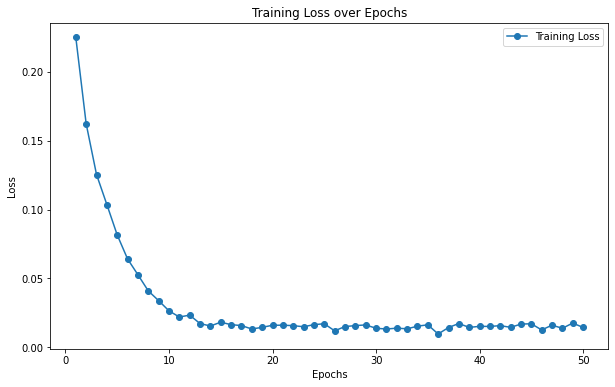

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

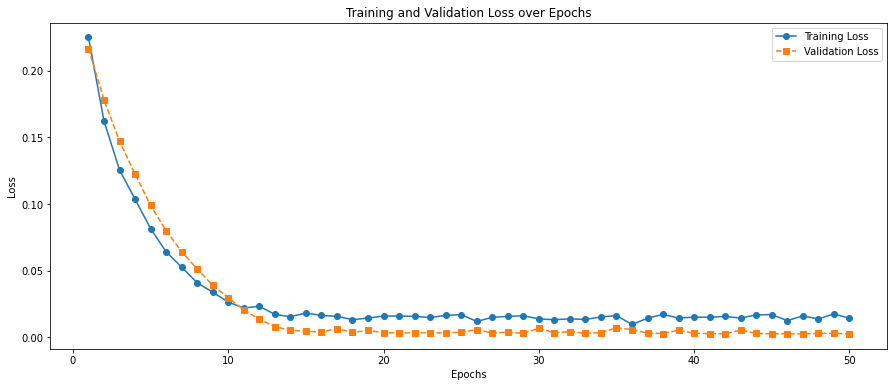

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Indian_model_LT4/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 13ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.07592341109855423
MAE : 0.06546635104448503


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,3.102551e+06,3151724.833
1,3.425436e+06,3719188.531
2,3.504805e+06,3636501.241
3,2.983231e+06,2526913.818
4,1.679850e+06,1128752.378
5,5.333031e+05,522831.371
6,1.269491e+05,346601.304
7,3.125422e+05,444914.605
8,4.856030e+05,827036.916
9,1.189945e+06,1142021.216


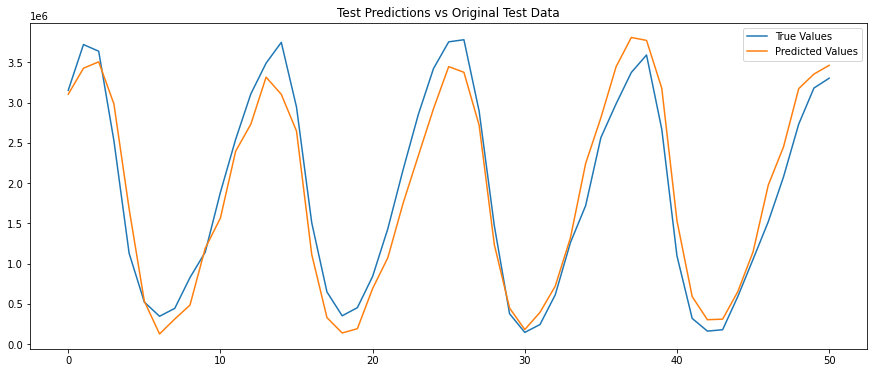

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

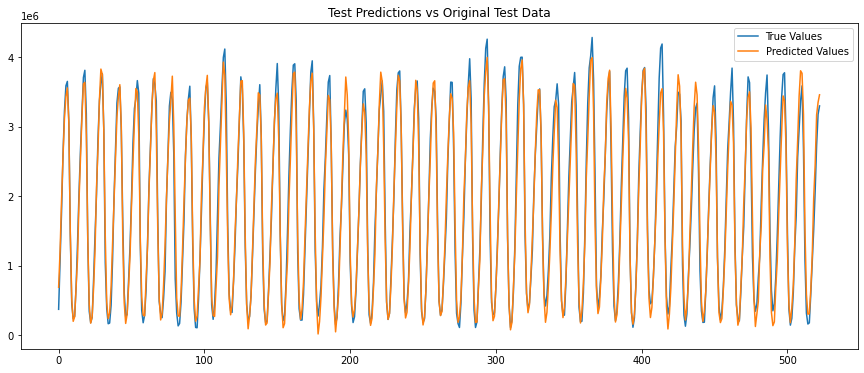

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()